In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver

chromedriver_path = "/Users/AliBaba/downloads/chromedriver"

browser = webdriver.Chrome(chromedriver_path)

In [25]:
def extract_price_info(start_day, end_day, url_dict, num_days):
    start_date = datetime.datetime.strptime(start_day, '%Y-%m-%d')
    end_date = datetime.datetime.strptime(end_day, '%Y-%m-%d')

    front_url = url_dict['front_url']
    middle_url = url_dict['middle_url']
    back_url = url_dict['back_url']
    
    fare_list = []
    
    for i in range(num_days):
        start = str(start_date).split()[0]
        end = str(end_date).split()[0]
        
        variable_url = front_url + start + middle_url + end + back_url
    
        cards = get_cards_via_soup(variable_url)
        day_dict = {}
        for card in cards:
            city, fare = convert_key_val(card)
            day_dict[city] = int(fare)
        
        series = pd.Series(day_dict)
        df = pd.DataFrame(series, columns=[start])
        fare_list.append(df)
        
        start_date = start_date + timedelta(days=1)
        end_date = end_date + timedelta(days=1)
    
    return fare_list

In [33]:
def print_countries_extracted(prices_frame):
    print("These are the countries for which we were able to pull prices:\n")
    print(list(prices_frame.index))

In [26]:
def get_cards_via_soup(variable_url):
    sleep(np.random.randint(3,7))
    
    browser.get(variable_url)
    
    soup = BeautifulSoup(browser.page_source, 'html.parser')
    
    return soup.select('div[class*=info-container]')

In [27]:
def convert_key_val(card):
    pre_city = card.select('h3')[0].text
    city = str(pre_city)
    pre_fare = card.select('span[class*=price]')[0].text
    fare = str(pre_fare)
    #Need to do this in order to ensure clean dataframe when concat the series
    if fare == '':
        fare = '0'
    else:   #lets just get the comma and dollar sign out of the way
        fare = (fare.replace(',','').split('$')[1])
    return city, fare

In [85]:
def combine_days(frame_list):
    first = frame_list[0]
    
    if (len(frame_list) == 1):
        print_countries_extracted(first)
        return first
    
    for x in range(1, len(frame_list)):
        next = frame_list[x]
        frame = pd.concat([first, next], axis=1, sort=False)
        first = frame
    
    #provide a list of the countries pulled - so can just copy & paste
    print_countries_extracted(frame)
    
    return frame.fillna(0)

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline

def four_destination_scatter(price_data_frame, destinations):
    fig, ax = plt.subplots(2, 2, figsize=(12,10))
    axis_coord = [[0,0], [0,1], [1,0], [1,1]]
    x = 0
    colors = ['green', 'red', 'blue', 'orange']
    for destination in destinations:
        coords = axis_coord[x]
        x_vals = list(price_data_frame.columns)
        y_vals = list(price_data_frame.loc[destination])
        ax[coords[0], coords[1]].scatter(x_vals, y_vals, label = destination, color=colors[x])
        ax[coords[0], coords[1]].set_title("Prices for {}".format(destination))
        ax[coords[0], coords[1]].set_ylim([100,1100])
        x += 1   
    fig.autofmt_xdate()

In [87]:
#URL for three European regions
western_europe_url = {}
western_europe_url['front_url'] = 'https://www.google.com/flights?hl=en#flt=/m/0rh6k.r/m/0852h.'
western_europe_url['middle_url'] = '*r/m/0852h./m/0rh6k.'
western_europe_url['back_url'] = ';c:USD;e:1;ls:1w;sd:1;t:e'

southern_europe_url = {}
southern_europe_url['front_url'] = 'https://www.google.com/flights?hl=en#flt=/m/0rh6k.r/m/0250wj.'
southern_europe_url['middle_url'] = '*r/m/0250wj./m/0rh6k.'
southern_europe_url['back_url'] = ';c:USD;e:1;ls:1w;sd:1;t:e'

eastern_europe_url = {}
eastern_europe_url['front_url'] = 'https://www.google.com/flights?hl=en#flt=/m/0rh6k.r/m/09b69.'
eastern_europe_url['middle_url'] = '*r/m/09b69./m/0rh6k.'
eastern_europe_url['back_url'] = ';c:USD;e:1;ls:1w;sd:1;t:e'

In [88]:
import numpy as np
import pandas as pd
import datetime
from datetime import date, timedelta
from time import sleep

#Here you get to pick the days you want to use
start_day = '2020-03-29'
end_day = '2020-04-12'

In [65]:
front = eastern_europe_url['front_url']
middle = eastern_europe_url['middle_url']
back = eastern_europe_url['back_url']
eastern_europe_prices = extract_price_info(start_day, end_day,
                                          eastern_europe_url, num_days=14)

In [66]:
ee_prices = combine_days(eastern_europe_prices)

These are the countries for which we were able to pull prices:

['Prague', 'Moscow', 'Budapest', 'Kyiv', 'Warsaw', 'Bucharest', 'Saint Petersburg', 'Kraków', 'Sofia', 'Chisinau', 'Minsk', 'Riga', 'Vilnius', 'Lviv', 'Wrocław', 'Tallinn', 'Gdańsk', 'Odesa', 'Sochi', 'Bydgoszcz', 'Cluj-Napoca', 'Constanța', 'Debrecen', 'Dnipro', 'Kharkiv', 'Iași', 'Kherson', 'Krasnodar', 'Košice', 'Katowice', 'Samara', 'Kazan', 'Łódź', 'Zaporizhzhia', 'Palanga', 'Poznań', 'Rostov-on-Don', 'Rzeszow', 'Sibiu', 'Timișoara', 'Ufa', 'Varna', 'Ulyanovsk', 'Arkhangelsk', 'Belgorod', 'Nizhny Novgorod', 'Izhevsk', 'Kaliningrad', 'Makhachkala', 'Szczecin', 'Burgas', 'Bratislava', 'Mineralnye Vody']


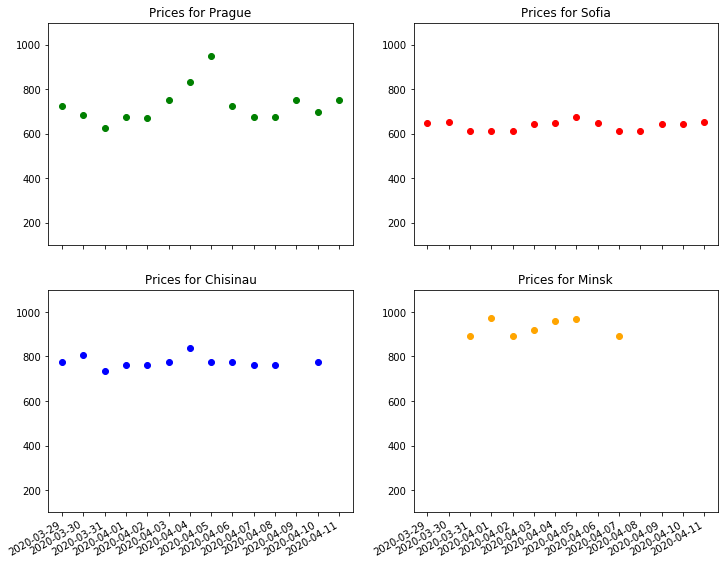

In [67]:
#pull four destinations from the list above and feed to scatter fxn
destinations = ['Prague', 'Sofia', 'Chisinau', 'Minsk']
four_destination_scatter(ee_prices, destinations)

In [89]:
#plot all on a single plot - can handle > 4 destinations
#THIS WON'T LOOK CLEAN IF INCLUDING DESTINATIONS WITH MISSING VALUES
def dest_single_plot(price_data_frame, destinations):
    fig = plt.figure(figsize=(10,6))
    for destination in destinations:
        x_vals = list(price_data_frame.columns)
        y_vals = list(price_data_frame.loc[destination])
        plt.plot(x_vals, y_vals, label=destination)

    plt.ylim([200, 1500])
    fig.autofmt_xdate()
    plt.legend(loc='best')

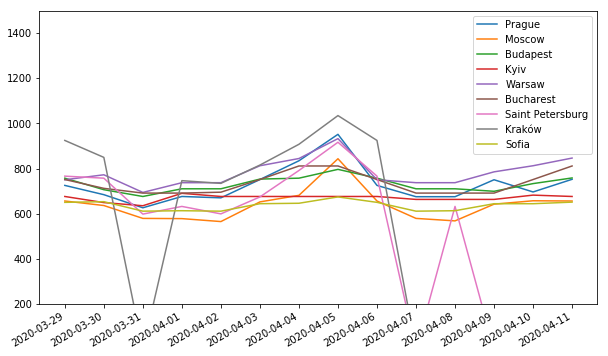

In [90]:
bigger_destinations = ['Prague', 'Moscow', 'Budapest', 'Kyiv', 
                       'Warsaw', 'Bucharest','Saint Petersburg', 
                       'Kraków', 'Sofia']
dest_single_plot(ee_prices, bigger_destinations)

In [84]:
ee_prices

,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11
Prague,726.0,685.0,627.0,677.0,671.0,752.0,835.0,952.0,726.0,676.0,676.0,751.0,697.0,753.0
Moscow,657.0,637.0,580.0,579.0,566.0,653.0,682.0,844.0,657.0,580.0,569.0,643.0,658.0,657.0
Budapest,758.0,707.0,677.0,711.0,711.0,754.0,758.0,797.0,758.0,711.0,711.0,700.0,734.0,759.0
Kyiv,677.0,650.0,636.0,691.0,677.0,677.0,677.0,677.0,677.0,664.0,664.0,664.0,683.0,677.0
Warsaw,751.0,773.0,695.0,738.0,738.0,813.0,845.0,933.0,751.0,738.0,738.0,786.0,813.0,847.0
Bucharest,752.0,713.0,692.0,692.0,696.0,752.0,812.0,812.0,752.0,692.0,692.0,692.0,752.0,812.0
Saint Petersburg,767.0,758.0,599.0,633.0,600.0,675.0,792.0,917.0,767.0,0.0,633.0,0.0,0.0,0.0
Kraków,925.0,850.0,0.0,747.0,735.0,816.0,908.0,1035.0,925.0,0.0,0.0,0.0,0.0,0.0
Sofia,651.0,654.0,612.0,614.0,612.0,645.0,647.0,675.0,651.0,612.0,614.0,645.0,645.0,652.0
Chisinau,776.0,806.0,737.0,760.0,760.0,776.0,838.0,777.0,776.0,760.0,760.0,0.0,777.0,0.0
